<a href="https://colab.research.google.com/github/a6ishek/Ipynb_Files_ML-DL/blob/main/MNIST_Handwritten_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow.keras as tf
import matplotlib.pyplot as plt


In [ ]:
mnist = tf.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

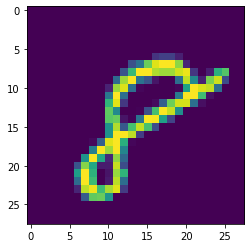

In [ ]:
plt.imshow(x_train[59999])
plt.show()

In [ ]:
y_train[59999]

8

In [ ]:
####Create a neural network
model = tf.models.Sequential()   ###empty nn model
model.add(tf.layers.Flatten()) ####always image data should be flattened at input layer
model.add(tf.layers.Dense(784,activation='relu')) ###hidden layer (28x28) good accuracy
model.add(tf.layers.Dense(10,activation='softmax')) ###output layer
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
###Scale the data (to improve the imaage zoom and thereby improve accuracy)
x_train = x_train/255  ###so it would change from 0-255 pixel range to 0-1 range
x_test = x_test/255    #### it would reduce the range from 0-255 to 0-1 which is good


In [ ]:
model.fit(x_train,y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 9s 5ms/step - loss: 2.6819 - accuracy: 0.9124
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3514 - accuracy: 0.9389
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3332 - accuracy: 0.9397
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2976 - accuracy: 0.9449
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2509 - accuracy: 0.9514
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2323 - accuracy: 0.9557
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2409 - accuracy: 0.9565
Epoch 8/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2150 - accuracy: 0.9591
Epoch 9/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2000 - accuracy: 0.9611
Epoch 10/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.198

In [ ]:
### if want to do 30 epoch continue with add of 10 to previous one
y_pred = model.predict(x_test)

In [ ]:
y_test[544]

4

In [ ]:
y_pred[544]

array([0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       1.000000e+00, 0.000000e+00, 0.000000e+00, 1.394326e-26,
       0.000000e+00, 0.000000e+00], dtype=float32)

In [ ]:
np.argmax(y_pred[544]) ### position digit of greatest probability

4

In [ ]:
model.evaluate(x_test,y_test) ###it gives the model prediction accuracy and it is clearly not overfit

313/313 [==============================] - 1s 2ms/step - loss: 0.4725 - accuracy: 0.9613


[0.47248148918151855, 0.9613000154495239]

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
print(confusion_matrix(y_test,np.argmax(y_pred,axis=1))) #### axis=1 to prevent single order error

[[ 955    0    1    0    0    0    5    2   17    0]
 [   1 1112    4    1    1    1    1    2   12    0]
 [   2    0  991    6    1    0    3    5   22    2]
 [   0    0    6  965    0   12    0    5   16    6]
 [   0    1    1    0  953    0    7    3    8    9]
 [   2    0    0   16    1  851    7    2   12    1]
 [   5    3    0    1    5    5  931    0    8    0]
 [   0    4   13    2    4    0    0  979   13   13]
 [   3    1    1    6    7   12    3    2  932    7]
 [   3    4    0   11   20    3    0    9   15  944]]


In [ ]:
print(classification_report(y_test,np.argmax(y_pred,axis=1)))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       980
           1       0.99      0.98      0.98      1135
           2       0.97      0.96      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.96      0.97      0.97       982
           5       0.96      0.95      0.96       892
           6       0.97      0.97      0.97       958
           7       0.97      0.95      0.96      1028
           8       0.88      0.96      0.92       974
           9       0.96      0.94      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000

